In [58]:
import pandas as pd #Importa pandas para el manejo de datos
import matplotlib.pyplot as plt #Importa matplotlib para la graficacion de datos
archivo = pd.read_csv("Base_de_datos.csv")# lee el archivo de datos
archivo #Escribe lo que leyo
print(df.columns.tolist())# Para revizar los encabezados



['Nombre', 'Cargo', 'Salario']


In [ ]:
df['Salario  '] = (
    df['Salario'].astype(str)
    .str.replace('$', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)  # Si hay comas como separador decimal
    .astype(float)) # arregla el campo salario a numero

In [60]:
df = pd.DataFrame(archivo)
df.columns = df.columns.str.strip()
# Eliminar filas vacías y donde no hay salario
df = df[df['Nombre'].notna() & df['Salario'].notna()]
df = df[~df['Nombre'].str.contains('Total|^$', na=False)]

df

,Nombre,Cargo,Salario
0,Ana Lívia S,Técnico de Producción I,3520
1,Leticia Barbosa,Ingeniero de Software II,11902
2,Antonella,Diretor Administrativo,17600
3,David,Analista Comercial I,5400
4,Louise,Técnico de Producción I,4840
...,...,...,...
202,Victoria,Técnico de Producción I,3520
203,Luisa,Analista Comercial II,7500
204,Ana Cecília,Técnico de Producción I,3740
205,Marta J,Técnico de Producción II,6160


         Nombre  Salario
2     Antonella    17600
98   Juan Pedro    14300
89      Cecília    14300
34      Anthony    14080
153      Daniel    13860
42        Isaac    13640
155      Emma J    13486
13      Melissa    13200
120   Ana Clara    13200
85      Celia B    12566
Nombre          object
Cargo           object
Salario          int64
Departamento    object
dtype: object
0
0
             Nombre                     Cargo  Salario    Departamento
0       Ana Lívia S   Técnico de Producción I     3520      Producción
1   Leticia Barbosa  Ingeniero de Software II    11902        Software
2         Antonella    Diretor Administrativo    17600  Administrativo
3             David      Analista Comercial I     5400       Comercial
4            Louise   Técnico de Producción I     4840      Producción
5       Pedro Lucas   Técnico de Producción I     3520      Producción
6          Isabella      Analista Comercial I     5400       Comercial
7             Lucas     Analista Comercial II  

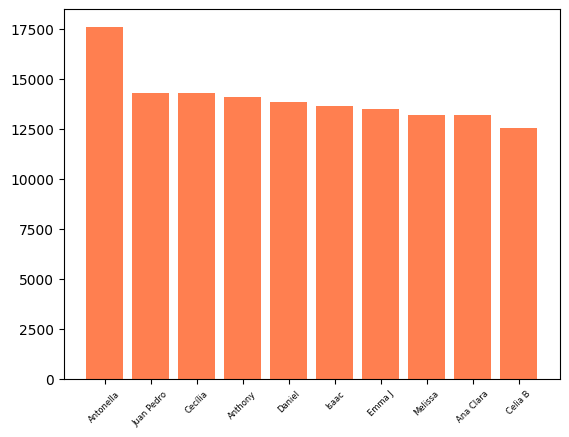

In [67]:

print(top10[['Nombre', 'Salario']])
print(top10.dtypes)
plt.xticks(rotation=45, fontsize=6)  # o más pequeño si hay muchos
top10 = df.sort_values(by='Salario', ascending=False).head(10)
plt.bar(top10['Nombre'], top10['Salario'], color='coral')

print(top10['Nombre'].isna().sum())  # ¿Cuántos están vacíos?
print(top10['Nombre'].duplicated().sum())  # ¿Hay duplicados?

print(df.head(20))  # mire las primeras 20 filas reales
print("Filas válidas:", len(df))






In [63]:
df['Departamento'] = df['Cargo'].str.extract('(Producción|Administrativo|Comercial|Software)', expand=False)


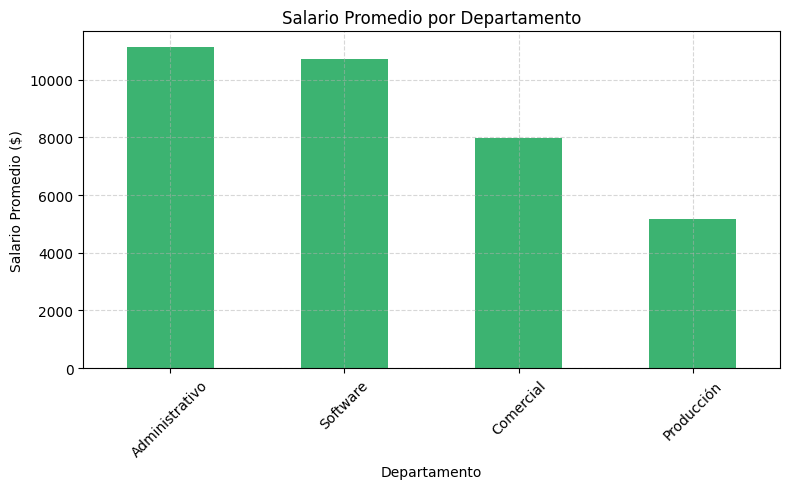

In [64]:
# Agrupar por departamento y calcular salario promedio
salario_dep = df.groupby('Departamento')['Salario'].mean().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(8, 5))
salario_dep.plot(kind='bar', color='mediumseagreen')
plt.title('Salario Promedio por Departamento')
plt.ylabel('Salario Promedio ($)')
plt.xlabel('Departamento')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
